<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:  http://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (transfusion.data)
- Perform some basic structural cleaning to facilitate the work

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
import numpy as np
import pandas as pd








from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

%matplotlib inline

In [61]:
data = pd.read_csv('transfusion.data', sep=",")
data

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [62]:
data.shape

(748, 5)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


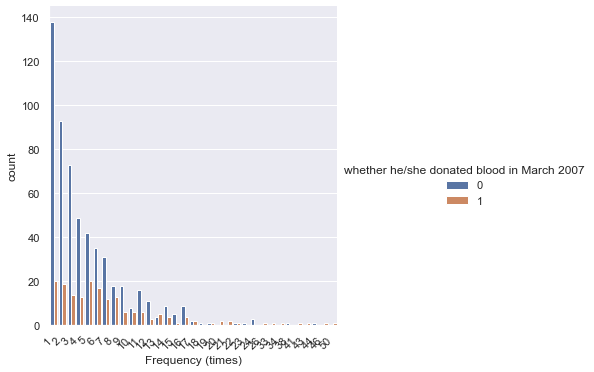

In [64]:
chart = sns.catplot(data=data, x='Frequency (times)', kind='count', hue='whether he/she donated blood in March 2007')
chart.set_xticklabels(rotation=45, horizontalalignment='right')

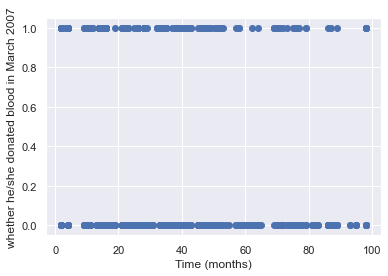

In [65]:
Nfig, ax = plt.subplots()
ax.scatter(y= data['whether he/she donated blood in March 2007'], x= data['Time (months)'])
ax.set_xlabel('Time (months)')
ax.set_ylabel('whether he/she donated blood in March 2007')
plt.show()

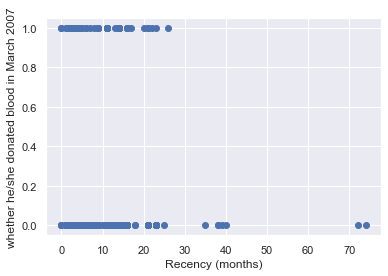

In [66]:
Nfig, ax = plt.subplots()
ax.scatter(y= data['whether he/she donated blood in March 2007'], x= data['Recency (months)'])
ax.set_xlabel('Recency (months)')
ax.set_ylabel('whether he/she donated blood in March 2007')
plt.show()

In [67]:
data['Recency (months)'] = np.where(data['Recency (months)'] > 45,0, data['Recency (months)'].mean())
print (data)

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0            9.506684                 50                  12500   
1            9.506684                 13                   3250   
2            9.506684                 16                   4000   
3            9.506684                 20                   5000   
4            9.506684                 24                   6000   
..                ...                ...                    ...   
743          9.506684                  2                    500   
744          9.506684                  2                    500   
745          9.506684                  3                    750   
746          9.506684                  1                    250   
747          0.000000                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  


In [68]:
data[['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']] [data['Recency (months)'] > 45]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007


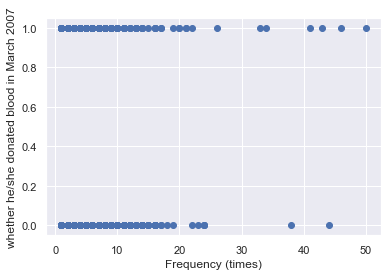

In [69]:
Nfig, ax = plt.subplots()
ax.scatter(y= data['whether he/she donated blood in March 2007'], x= data['Frequency (times)'])
ax.set_xlabel('Frequency (times)')
ax.set_ylabel('whether he/she donated blood in March 2007')
plt.show()

In [70]:
data[['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']] [data['Frequency (times)'] > 30]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,9.506684,50,12500,98,1
9,9.506684,46,11500,98,1
341,9.506684,38,9500,98,0
500,9.506684,43,10750,86,1
502,9.506684,34,8500,77,1
503,9.506684,44,11000,98,0
505,9.506684,41,10250,98,1
517,9.506684,33,8250,98,1


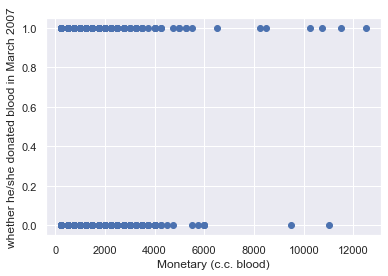

In [71]:
Nfig, ax = plt.subplots()
ax.scatter(y= data['whether he/she donated blood in March 2007'], x= data['Monetary (c.c. blood)'])
ax.set_xlabel('Monetary (c.c. blood)')
ax.set_ylabel('whether he/she donated blood in March 2007')
plt.show()

In [72]:
data[['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']] [data['Monetary (c.c. blood)'] > 8000]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,9.506684,50,12500,98,1
9,9.506684,46,11500,98,1
341,9.506684,38,9500,98,0
500,9.506684,43,10750,86,1
502,9.506684,34,8500,77,1
503,9.506684,44,11000,98,0
505,9.506684,41,10250,98,1
517,9.506684,33,8250,98,1


In [73]:
data['Monetary (c.c. blood)'] = np.where(data['Monetary (c.c. blood)'] > 8000,0, data['Monetary (c.c. blood)'].mean())
print (data)

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0            9.506684                 50               0.000000   
1            9.506684                 13            1378.676471   
2            9.506684                 16            1378.676471   
3            9.506684                 20            1378.676471   
4            9.506684                 24            1378.676471   
..                ...                ...                    ...   
743          9.506684                  2            1378.676471   
744          9.506684                  2            1378.676471   
745          9.506684                  3            1378.676471   
746          9.506684                  1            1378.676471   
747          0.000000                  1            1378.676471   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28                                           1  


In [74]:
data[['Recency (months)','Frequency (times)', 'Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']] [data['Monetary (c.c. blood)'] > 8000]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007


In [75]:
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [76]:
# Search for explicit duplicates
data[data.duplicated()]

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
18,9.506684,6,1378.676471,15,1
20,9.506684,3,1378.676471,4,1
23,9.506684,6,1378.676471,16,1
28,9.506684,5,1378.676471,11,1
31,9.506684,10,1378.676471,28,1
...,...,...,...,...,...
737,9.506684,1,1378.676471,23,0
738,9.506684,1,1378.676471,23,0
739,9.506684,4,1378.676471,52,0
740,9.506684,1,1378.676471,23,0


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? Recency, Frequency, Monetary
- Is there an output variable (label)? Yes
- If there is an output variable:
    - What is it?  Donated_Mar_2007
    - What is its type? Time
- What type of Modelling is it?
    - [X] Supervised <-- this one
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [X] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [77]:
#Extracting Independent and dependent Variable  
X= data.drop(['whether he/she donated blood in March 2007'], axis=1)  
y= data['whether he/she donated blood in March 2007']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (598, 4)
Testing split input-  (150, 4)


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train,y_train)

In [79]:
#prediction
y_pred = classifier.predict(X_test)#Accuracy
print('Accuracy Score:', metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.7466666666666667


In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[100,  17],
       [ 21,  12]], dtype=int64)

In [81]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree = DecisionTreeClassifier()


# Step 9: Fit the Model

In [82]:
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [83]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       117
           1       0.41      0.36      0.39        33

    accuracy                           0.75       150
   macro avg       0.62      0.61      0.61       150
weighted avg       0.74      0.75      0.74       150



# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [84]:
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = prediction.astype(int)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()

In [85]:
y_train_pred = dtree.predict(X_train)

In [86]:
dtree.score(X_train, y_train)

0.8896321070234113

Accuracy : 0.8896 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.9072 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.6069 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.7935                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


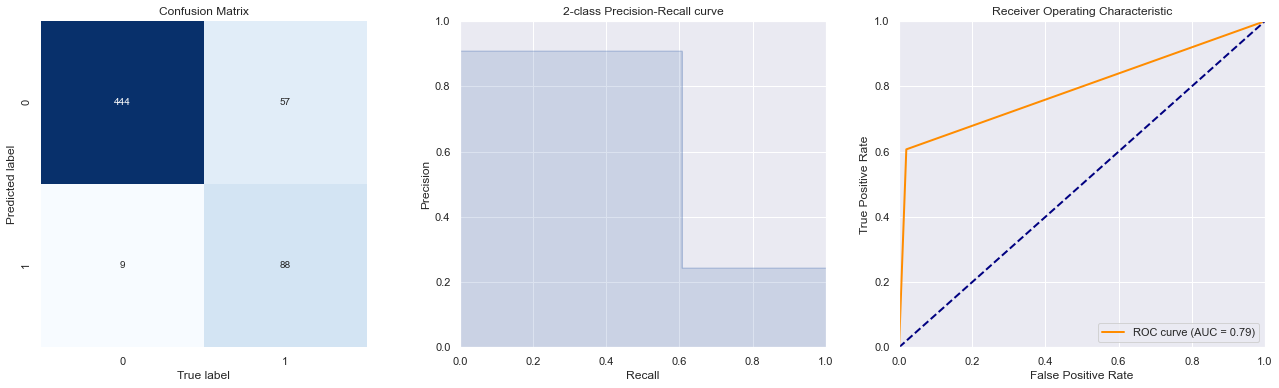

In [87]:
show_summary_report(y_train, y_train_pred)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy : 0.8712 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 1.0000 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.4690 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.9440                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


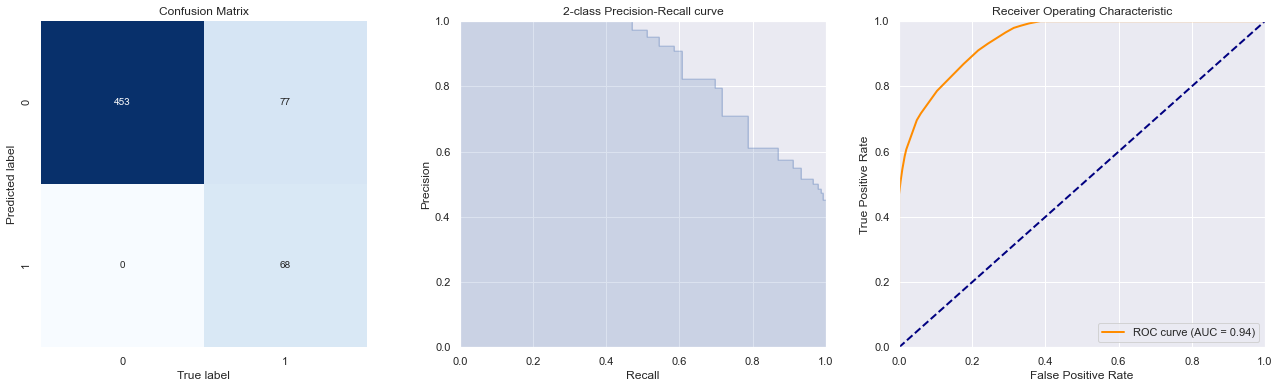

In [88]:
y_train_pred_prob = dtree.predict_proba(X_train)[:, 1]
show_summary_report(y_train, y_train_pred_prob)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [89]:
y_test_pred = dtree.predict(X_test)

In [90]:
dtree.score(X_test, y_test)

0.7466666666666667

Accuracy : 0.7467 [TP / N]         Best: 1, Worst: 0
           Proportion of predicted labels that match the true labels.
Precision: 0.4138 [TP / (TP + FP)] Best: 1, Worst: 0
           Not to label a negative sample as positive.
Recall   : 0.3636 [TP / (TP + FN)] Best: 1, Worst: 0
           Find all the positive samples.
ROC AUC  : 0.6092                  Best: 1, Worst: < 0.5
--------------------------------------------------------------------------------
TP: True Positives, FP: False Positives,
TN: True Negatives, FN: False Negatives,
N: Number of samples


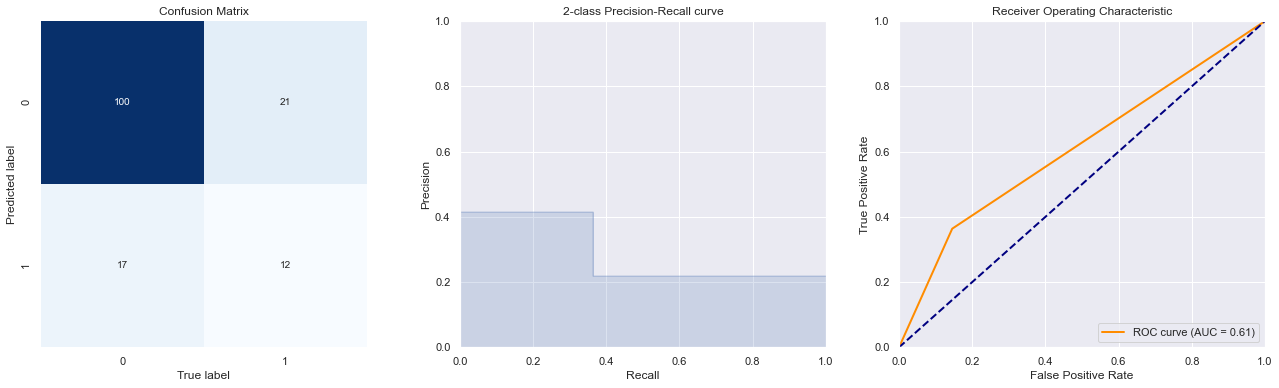

In [91]:
show_summary_report(y_test, y_test_pred)



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



